In [1]:
from sklearn import linear_model # for model
from sklearn.datasets import load_iris # the iris dataset 

import numpy
numpy.set_printoptions(suppress=True) # disable scientific notation

# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
iris = load_iris() # load iris dataset

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = linear_model.LogisticRegression(max_iter=121) # make logistic regression model, 121 is the minimum # such that it doesn't reach the max and error 
model.fit(iris.data, iris.target) # fit model to dataset 

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_)) # print coefficients 

Intercept: [  9.84868308   2.23812007 -12.08680314]  Coefficients: [[-0.42340559  0.96738828 -2.51705023 -1.079183  ]
 [ 0.53451718 -0.32190884 -0.206466   -0.94444826]
 [-0.11111159 -0.64547945  2.72351623  2.02363125]]


In [4]:
start_class_two = list(iris.target).index(1)
start_class_three = list(iris.target).index(2)
# Use the first input from each class
inputs = [iris.data[0], iris.data[start_class_two], iris.data[start_class_three]]

print('Class predictions: {0}'.format(model.predict(inputs))) # predict which class, should be [0, 1, 2]
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # get probability of each class

Class predictions: [0 1 2]
Probabilities:
[[0.9815837  0.01841629 0.00000001]
 [0.00212872 0.87396586 0.12390542]
 [0.00000091 0.00391146 0.99608763]]


In [5]:
# use only two features to train second logistic regression model, the first and fourth column 
x1_feature = 0
x2_feature = 3

partial_data = iris.data[:,[x1_feature, x2_feature]] # get the first and fourth clumn 

partial_model = linear_model.LogisticRegression() # make model 
partial_model.fit(partial_data, iris.target) # fit model 

partial_inputs = [partial_data[0], partial_data[start_class_two], partial_data[start_class_three]] # make new inputs with only two features each

print('Class predictions: {0}'.format(partial_model.predict(partial_inputs))) # predict which class
print('Probabilities:\n{0}'.format(partial_model.predict_proba(partial_inputs))) # get probability of each class

Class predictions: [0 1 2]
Probabilities:
[[0.92831857 0.07157087 0.00011056]
 [0.00559652 0.62519423 0.36920925]
 [0.00001365 0.03313084 0.96685551]]


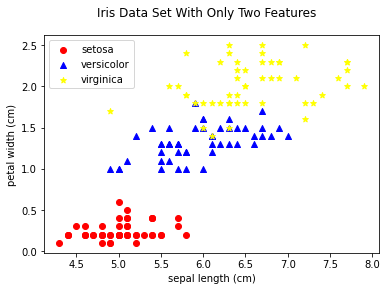

In [6]:
# split the two inputs into single dimensional arrays for plotting
x1 = partial_data[:,0]
x2 = partial_data[:,1]

fig = plt.figure() # create figure 
fig.suptitle('Iris Data Set With Only Two Features') # set title 
plt.xlabel(iris.feature_names[x1_feature]) # set x label 
plt.ylabel(iris.feature_names[x2_feature]) # set y label 

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = plt.scatter(x1[:start_class_two], x2[:start_class_two],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = plt.scatter(x1[start_class_two:start_class_three], x2[start_class_two:start_class_three],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = plt.scatter(x1[start_class_three:], x2[start_class_three:],
                                      c="yellow", marker="*", label=iris.target_names[2])

plt.legend(handles=[scatter_0, scatter_1, scatter_2]) # add a legend
plt.show() # show the graph

# Exercise Option #1 - Standard Difficulty

Answer the following questions. You can also use the graph below, if seeing the data visually helps you understand the data.
1. In the above cell, the expected class predictions should be [0, 1, 2], because the first datapoint of each class was used. If the model was not giving the expected output, some reasons could be that the data values chosen to test were outliers, or that logistic regression does not work well predicting the data. 
2. The probabilities relate to the class predictions because each class prediction is just the class with the highest probabilitiy. The model is more or less confident in its predictions based on the logit function. 
3. If a coefficient is negative, that means that if you took a datapoint and increased the value of a feature that has a negative coeficcient, the probability the model outputs should decrease.
4. The two features do not predict very well the iris data. Although for the three datapoints tested it predicted correctly, the confidence for one of the the predictions was only 62%. Also, if you look at the graph of the dataset with the two features, you can see that there is overlap between veriscolor and virginica, which would explain the 62% confidence. 
5. As seen below, using all the different feature pair combinations, the best pair was petal length and petal width. I know this because I calculated for each combination how confident the model was for the expected outputs. This finding actually aligns with what I found about the iris dataset with a decision tree: in the case of the decision tree, most nodes separated the data based on petal length and petal width, i.e. that they were the best predictors.  

In [7]:
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
feature_pair_probabilities = []
feature_pair_models = []

# generate model and probabilities for each feature pair 
for feature_pair in feature_pairs:
    feature_pair_data = iris.data[:,feature_pair] # get data of feature pair 
    feature_pair_model = linear_model.LogisticRegression() # make model 
    feature_pair_model.fit(feature_pair_data, iris.target) # fit model to feature pair 
    feature_pair_inputs = [feature_pair_data[0], feature_pair_data[start_class_two], feature_pair_data[start_class_three]] # make new inputs with only the feature pair
    feature_pair_probabilities.append(feature_pair_model.predict_proba(feature_pair_inputs)) # push class probabilities for specific feature pair to array
    feature_pair_models.append(feature_pair_model) # push model to array for later use 
    
best_pair_score = 0 # scale from 0-1, how well feature pair performed based on how close it was to expected outputs 
best_pair = [] # feature pair with best score 
# https://stackoverflow.com/questions/23828242/how-to-set-a-python-variable-to-undefined
best_model = None # the most accurate model 
index = 0 # for indexing 

for feature_pair_probability in feature_pair_probabilities:
    # print probabilities for feature pair 
    print('Probabilities for {} & {}:\n{}'.format(iris.feature_names[feature_pairs[index][0]], iris.feature_names[feature_pairs[index][1]], feature_pair_probability))
    # calculate score
    feature_pair_score = ((feature_pair_probability[0][0]/1)+(feature_pair_probability[1][1]/1)+(feature_pair_probability[2][2]/1))/3
    # if it's better than current best feature pair score, update it 
    if (feature_pair_score > best_pair_score):
        best_pair_score = feature_pair_score
        best_pair = feature_pairs[index]
        best_model = feature_pair_models[index]
    # index 
    index += 1
    
# print info on the best feature pair 
print('Best pair: {} & {}, with score: {}'.format(iris.feature_names[best_pair[0]], iris.feature_names[best_pair[1]], best_pair_score))

Probabilities for sepal length (cm) & sepal width (cm):
[[0.92347315 0.0585081  0.01801875]
 [0.00176572 0.1981595  0.80007478]
 [0.05009604 0.37235578 0.57754818]]
Probabilities for sepal length (cm) & petal length (cm):
[[0.97521958 0.02478036 0.00000005]
 [0.00105972 0.7765676  0.22237268]
 [0.00000087 0.01201376 0.98798537]]
Probabilities for sepal length (cm) & petal width (cm):
[[0.92831857 0.07157087 0.00011056]
 [0.00559652 0.62519423 0.36920925]
 [0.00001365 0.03313084 0.96685551]]
Probabilities for sepal width (cm) & petal length (cm):
[[0.98200697 0.01799299 0.00000004]
 [0.00633308 0.66738949 0.32627743]
 [0.0000065  0.01584795 0.98414555]]
Probabilities for sepal width (cm) & petal width (cm):
[[0.95767161 0.04223211 0.00009628]
 [0.10787733 0.65224682 0.23987585]
 [0.00009767 0.02361994 0.97628239]]
Probabilities for petal length (cm) & petal width (cm):
[[0.97983058 0.02016939 0.00000003]
 [0.0024148  0.77883567 0.21874952]
 [0.00000027 0.00463449 0.99536524]]
Best pair:

# Exercise Option #2 - Advanced Difficulty
As seen below, to try to show model fit, I graphed the dataset against the predictions of the model. If you look at the graph, it seems like the model only incorrectly predicted 4 or 5 of the datapoints. 

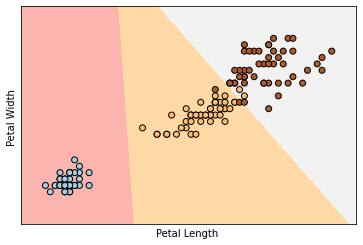

In [8]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py
# Got help from Huxley for this. 
# I use the model using the best pair of features for this. 

X = iris.data[:, best_pair] # input data, use the best two features 
Y = iris.target # expected values of input data 
x1 = X[:, 0] # datapoints with only first feature 
x2 = X[:, 1] # datapoits with only second feature 

# get the min and max values of dataset, with 0.5 padding added 
x_min, x_max = x1.min()-0.5, x1.max()+0.5
y_min, y_max = x2.min()-0.5, x2.max()+0.5
step = .01  # step size in the mesh

# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, step), numpy.arange(y_min, y_max, step))
#print(xx)
#print(yy)
#print(numpy.c_[xx.ravel(), yy.ravel()])
# https://numpy.org/doc/stable/reference/generated/numpy.c_.html
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
Z = best_model.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure() # make figure 
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.pcolormesh(xx, yy, Z, cmap='Pastel1', shading='auto')

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(x1, x2, c=Y, edgecolors='black', cmap=plt.cm.Paired) # plot all the training points with their expected colors

# https://thispointer.com/python-capitalize-the-first-letter-of-each-word-in-a-string/#:~:text=Use%20title()%20to%20capitalize,of%20word%20to%20lower%20case.
# https://www.askpython.com/python/string/remove-character-from-string-python
plt.xlabel(iris.feature_names[best_pair[0]].replace('(cm)', '').title()) # get the name of the x-axis feature, remove units, and capitalize each word
plt.ylabel(iris.feature_names[best_pair[1]].replace('(cm)', '').title()) # get the name of the y-axis feature, remove units, and capitalize each word

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
plt.xlim(x_min, x_max) # set min and max of x-axis
plt.ylim(y_min, y_max) # set min and max of y-axis

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(()) # remove ticks on x-axis
plt.yticks(()) # remove ticks on y-axis

plt.show() # show graph 